In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from image import draw_bounding_boxes, generate_image, draw_bounding_boxes_from_tensor
from model import TinyYoloModel
from data import get_generator
from loss import YoloLoss

In [2]:
generator = get_generator(image_size=(448, 448), batch_size=32)

# Check generated images

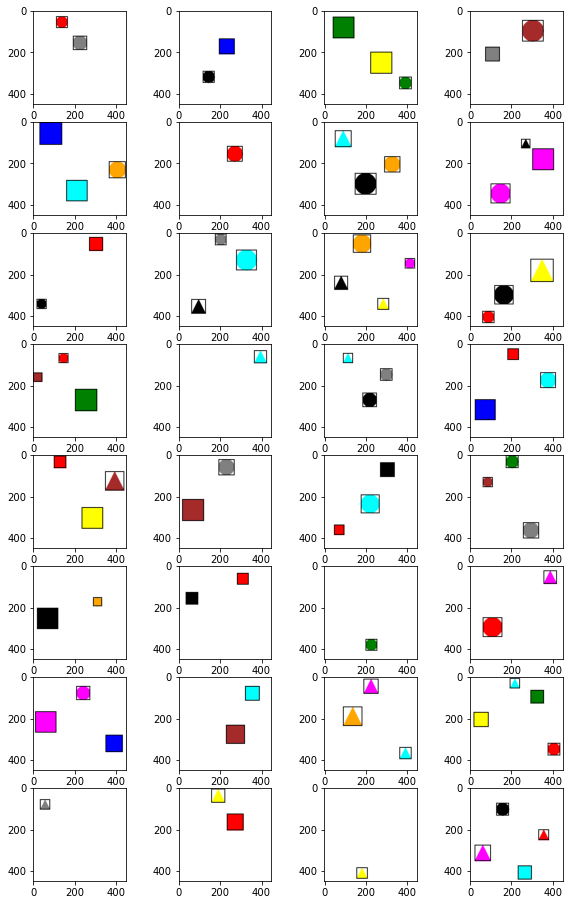

In [3]:
fig, axes = plt.subplots(8, 4, figsize=(10, 16))

batch = next(generator())

for index in range(32):
    axes[index//4, index%4].imshow(draw_bounding_boxes_from_tensor(batch[0][index] * 255., batch[1][index]))
    
plt.show()

# Draw bounding boxes

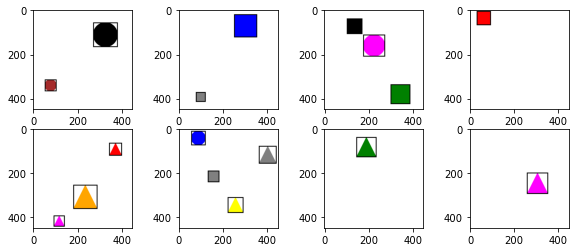

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(10, 4))

for index in range(8):
    image, boxes = generate_image(image_size=(448, 448))    
    axes[index//4, index%4].imshow(draw_bounding_boxes(image, boxes))
    
plt.show()

# Create model

In [5]:
yolo_model = TinyYoloModel(input_image_shape=(448, 448, 3), num_classes=3, num_boxes_per_cell=1)

In [24]:
TRAIN = True
LOAD_EXISTING = True

# Load existing model

In [25]:
if LOAD_EXISTING:
    yolo_model.load_weights("./results/tiny_yolo_model.h5")

# Train until loss < 1

In [26]:
loss_object = YoloLoss()
loss_object.config(num_classes=3, num_boxes_per_cell=1)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, )

# yolo_model.compile(optimizer, loss_object)

if TRAIN:   
    epoch = 1

    while True:
        batch = next(generator())

        with tf.GradientTape() as tape:
            result = yolo_model(batch[0])
            loss_value = loss_object(batch[1], result)
            grads = tape.gradient(loss_value, yolo_model.trainable_variables)
            optimizer.apply_gradients(zip(grads, yolo_model.trainable_variables))
            print("Epoch {} loss {}".format(epoch, loss_value.numpy().mean()))

            if loss_value.numpy().mean() < 1:
                break

        if epoch % 100 == 0:
            yolo_model.save_weights("./results/tiny_yolo_model.h5")

        epoch += 1

Epoch 1 loss 9540.681640625
Epoch 2 loss 9518.841796875
Epoch 3 loss 10495.29296875
Epoch 4 loss 8448.0625
Epoch 5 loss 9382.4267578125
Epoch 6 loss 9129.9267578125
Epoch 7 loss 10526.16015625
Epoch 8 loss 10120.0087890625
Epoch 9 loss 7484.93359375
Epoch 10 loss 8765.41796875
Epoch 11 loss 9149.6005859375
Epoch 12 loss 10127.8505859375
Epoch 13 loss 9112.720703125
Epoch 14 loss 8201.9638671875
Epoch 15 loss 9753.7431640625
Epoch 16 loss 9310.072265625
Epoch 17 loss 8767.3515625
Epoch 18 loss 9715.53125
Epoch 19 loss 9326.6005859375
Epoch 20 loss 8185.421875


KeyboardInterrupt: 

# Evaluate

In [20]:
batch = next(generator())
result = yolo_model(batch[0])

print(result.shape, batch[1].shape)

(32, 392) (32, 392)
